# 02 — Exploration (EDA) guidée

**Objectif** : comprendre la cible, les valeurs manquantes et les relations simples entre variables et survie.

**Règles** : graphiques clairs (matplotlib), une figure par cellule, pas de couleurs forcées.

## 1) Chargement

In [1]:
import pandas as pd
from pathlib import Path

train = pd.read_csv(Path("../data")/"train.csv")
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 2) Distribution de la cible

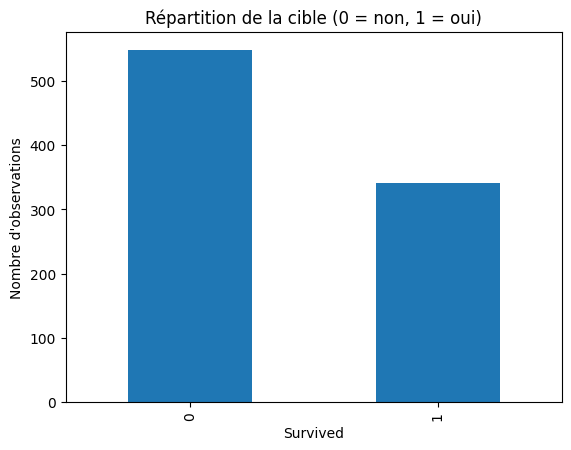

In [2]:
import matplotlib.pyplot as plt

counts = train["Survived"].value_counts().sort_index()
plt.figure()
counts.plot(kind="bar")
plt.title("Répartition de la cible (0 = non, 1 = oui)")
plt.xlabel("Survived")
plt.ylabel("Nombre d'observations")
plt.show()

## 3) Valeurs manquantes

In [3]:
missing = train.isna().mean().sort_values(ascending=False)
missing

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

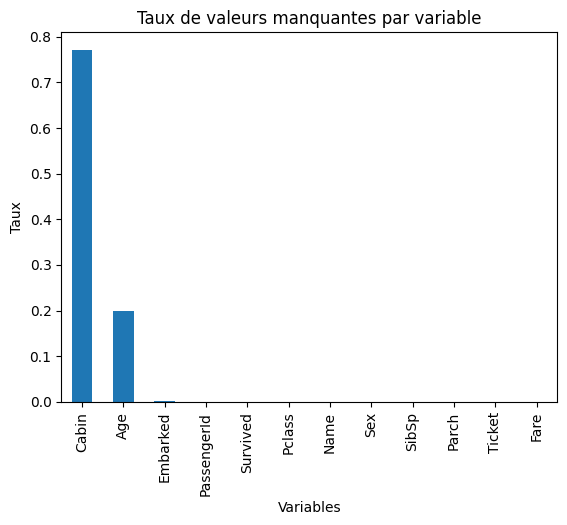

In [4]:
import matplotlib.pyplot as plt

plt.figure()
missing.plot(kind="bar")
plt.title("Taux de valeurs manquantes par variable")
plt.xlabel("Variables")
plt.ylabel("Taux")
plt.show()

## 4) Variables continues : Age, Fare

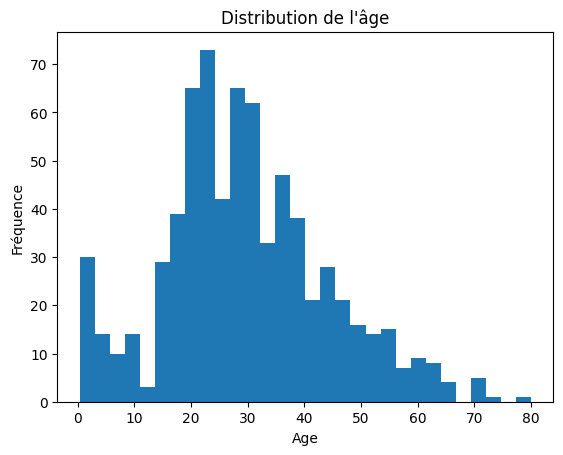

In [5]:
import matplotlib.pyplot as plt

plt.figure()
train["Age"].dropna().plot(kind="hist", bins=30)
plt.title("Distribution de l'âge")
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.show()

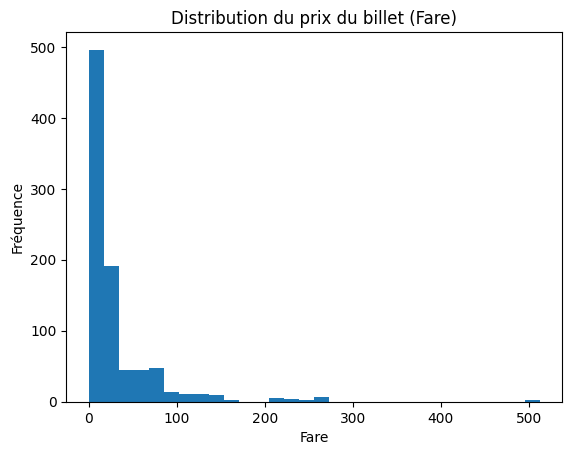

In [6]:
import matplotlib.pyplot as plt

plt.figure()
train["Fare"].dropna().plot(kind="hist", bins=30)
plt.title("Distribution du prix du billet (Fare)")
plt.xlabel("Fare")
plt.ylabel("Fréquence")
plt.show()

## 5) Relations simples avec la survie

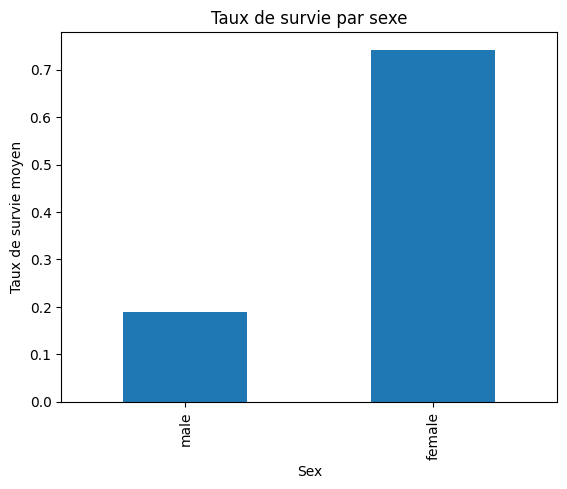

In [7]:
import matplotlib.pyplot as plt

by_sex = train.groupby("Sex")["Survived"].mean().sort_values()
plt.figure()
by_sex.plot(kind="bar")
plt.title("Taux de survie par sexe")
plt.xlabel("Sex")
plt.ylabel("Taux de survie moyen")
plt.show()

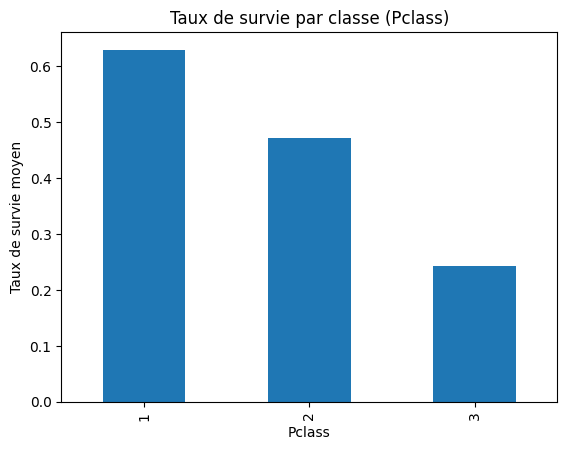

In [8]:
import matplotlib.pyplot as plt

by_pclass = train.groupby("Pclass")["Survived"].mean().sort_index()
plt.figure()
by_pclass.plot(kind="bar")
plt.title("Taux de survie par classe (Pclass)")
plt.xlabel("Pclass")
plt.ylabel("Taux de survie moyen")
plt.show()

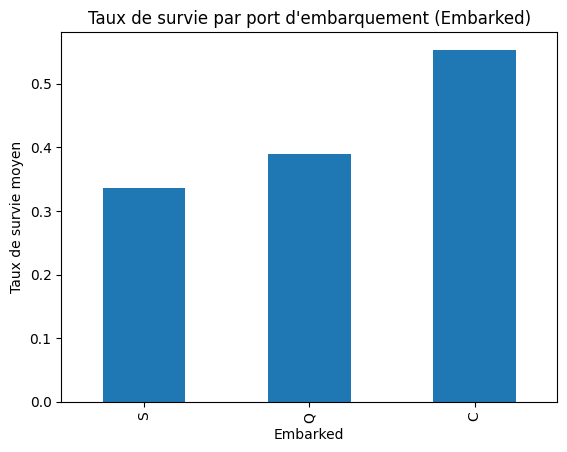

In [9]:
import matplotlib.pyplot as plt

by_embarked = train.groupby("Embarked")["Survived"].mean().sort_values()
plt.figure()
by_embarked.plot(kind="bar")
plt.title("Taux de survie par port d'embarquement (Embarked)")
plt.xlabel("Embarked")
plt.ylabel("Taux de survie moyen")
plt.show()

> Prochaine étape → 03_baseline_logistic.ipynb : pipeline, validation croisée, prédictions.